In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
df = pd.read_csv('euro2024_players.csv')

In [3]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [4]:
df.shape

(623, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [6]:
country_goals = {}

In [7]:
for country in df['Country'].unique():
    total_goals = df[df['Country'] == country]['Goals'].sum()
    print(country, total_goals)
    # country_goals.update({country: total_goals})
    country_goals[country] = total_goals

Germany 134
Scotland 59
Hungary 60
Switzerland 125
Spain 95
Croatia 147
Albania 40
Italy 59
Slovenia 78
England 100
Denmark 135
Serbia 129
Poland 154
Netherlands 141
Austria 93
France 192
Belgium 177
Slovakia 67
Romania 63
Ukraine 114
Turkiye 71
Georgia 64
Portugal 225
Czech Republic 65


In [8]:
country_goals

{'Germany': 134,
 'Scotland': 59,
 'Hungary': 60,
 'Switzerland': 125,
 'Spain': 95,
 'Croatia': 147,
 'Albania': 40,
 'Italy': 59,
 'Slovenia': 78,
 'England': 100,
 'Denmark': 135,
 'Serbia': 129,
 'Poland': 154,
 'Netherlands': 141,
 'Austria': 93,
 'France': 192,
 'Belgium': 177,
 'Slovakia': 67,
 'Romania': 63,
 'Ukraine': 114,
 'Turkiye': 71,
 'Georgia': 64,
 'Portugal': 225,
 'Czech Republic': 65}

In [9]:
# Sort the dictionary
country_goals = dict(sorted(country_goals.items(), key=lambda item: item[1], reverse=True))

In [64]:
country_goals

{'Portugal': 225,
 'France': 192,
 'Belgium': 177,
 'Poland': 154,
 'Croatia': 147,
 'Netherlands': 141,
 'Denmark': 135,
 'Germany': 134,
 'Serbia': 129,
 'Switzerland': 125,
 'Ukraine': 114,
 'England': 100,
 'Spain': 95,
 'Austria': 93,
 'Slovenia': 78,
 'Turkiye': 71,
 'Slovakia': 67,
 'Czech Republic': 65,
 'Georgia': 64,
 'Romania': 63,
 'Hungary': 60,
 'Scotland': 59,
 'Italy': 59,
 'Albania': 40}

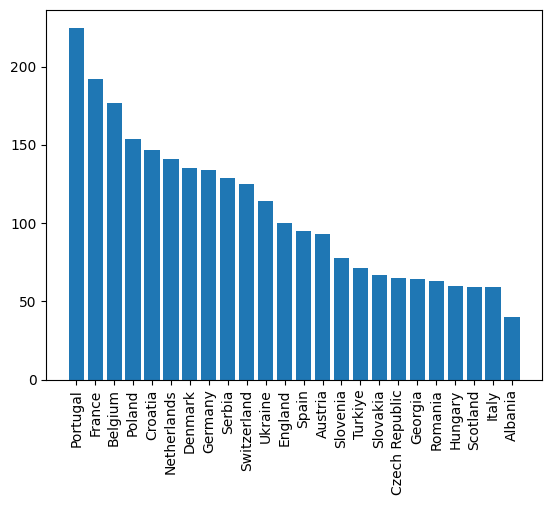

In [72]:
countries = list(country_goals.keys())
goals = list(country_goals.values())
plt.bar(countries, goals)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
# Min, Max and Avg age of of each country player
print('Country, AVG, Min, Max')
for country in df['Country'].unique():
    avg_age = df[df['Country'] == country]['Age'].mean()
    min_age = df[df['Country'] == country]['Age'].min()
    max_age = df[df['Country'] == country]['Age'].max()

    print(f'{country},{round(avg_age)},{min_age},{max_age}')

Country, AVG, Min, Max
Germany,28,20,38
Scotland,28,21,32
Hungary,27,20,34
Switzerland,28,21,35
Spain,27,16,38
Croatia,28,21,38
Albania,27,20,35
Italy,26,22,34
Slovenia,27,21,36
England,26,19,34
Denmark,28,21,37
Serbia,27,20,35
Poland,28,19,36
Netherlands,27,21,34
Austria,27,20,35
France,27,18,37
Belgium,27,19,37
Slovakia,27,18,37
Romania,27,22,36
Ukraine,26,21,34
Turkiye,26,18,35
Georgia,27,18,38
Portugal,27,19,41
Czech Republic,25,20,31


In [12]:
# Market value analysis
df['MarketValue'].describe()

count    6.230000e+02
mean     1.840903e+07
std      2.426195e+07
min      5.000000e+04
25%      2.900000e+06
50%      9.000000e+06
75%      2.500000e+07
max      1.800000e+08
Name: MarketValue, dtype: float64

In [13]:
df['MarketValue'].mode()

0    5000000
Name: MarketValue, dtype: int64

In [14]:
df['MarketValue'].median()

9000000.0

In [15]:
df['MarketValue'].mean()

18409028.892455857

In [16]:
df['MarketValue'].skew()

2.678094329050169

In [17]:
len(df['MarketValue'].unique())

83

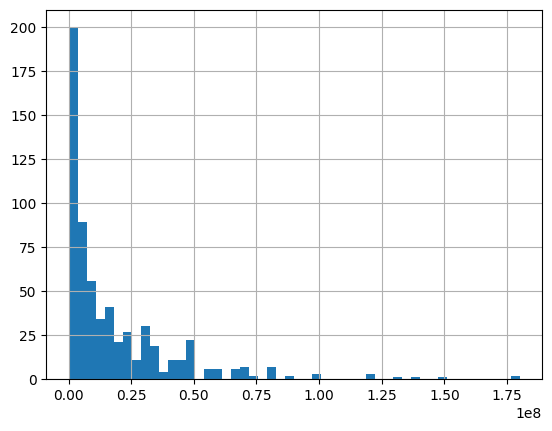

In [18]:
df['MarketValue'].hist(bins = 50)
plt.show()

In [19]:
df.columns

Index(['Name', 'Position', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals',
       'MarketValue', 'Country'],
      dtype='object')

### Bivariate analysis

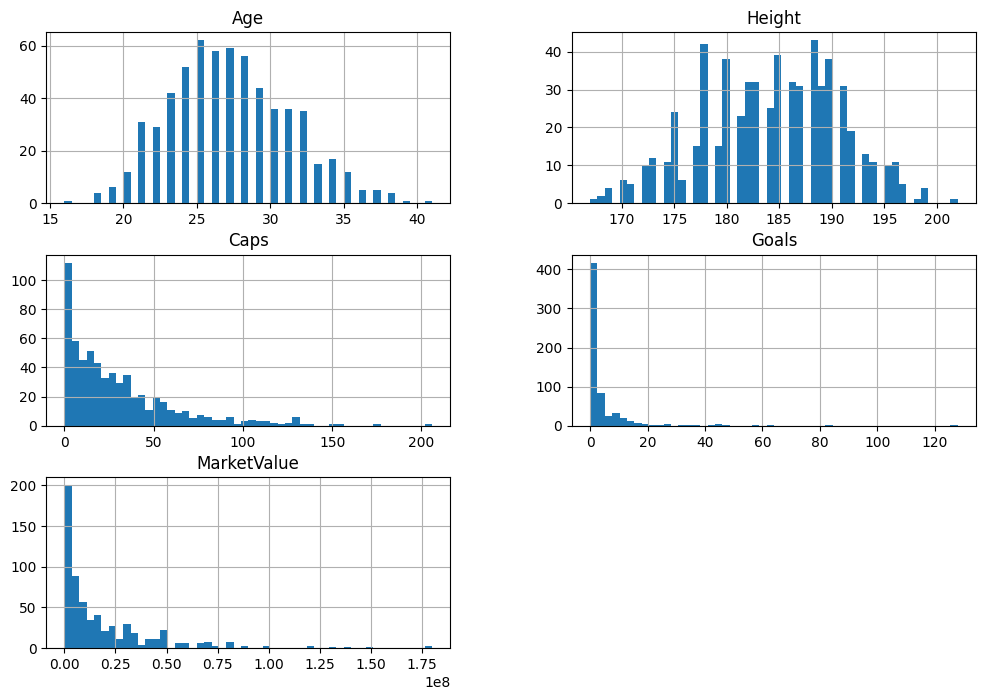

In [20]:
df.hist(bins = 50, figsize=(12, 8))
plt.show()

In [21]:
# Pearson correlation between age and market value
r, p = stats.pearsonr(df.Age, df.MarketValue)
print(f'Correlation (r): {r:.3f}')
print(f'P-value: {p:.3f}')

Correlation (r): -0.331
P-value: 0.000


In [22]:
# Kendall's tau correlation between age and market value
r, p = stats.kendalltau(df.Age, df.MarketValue)
print(f'Correlation (r): {r:.3f}')
print(f'P-value: {p:.3f}')

Correlation (r): -0.274
P-value: 0.000


In [23]:
# Spearman correlation between age and market value
r, p = stats.spearmanr(df.Age, df.MarketValue)
print(f'Correlation (r): {r:.3f}')
print(f'P-value: {p:.3f}')

Correlation (r): -0.384
P-value: 0.000


In [24]:
df.Age.min()

16

Here all three types of correlation is negative and the coefficient is pretty big. So there is a significant negative correlation between 'Age' and 'MarketValue'

In [25]:
m, c , _, _, _ = stats.linregress(df.Age, df.MarketValue)
x = range(df.Age.min(), df.Age.max())
y = m*x + c

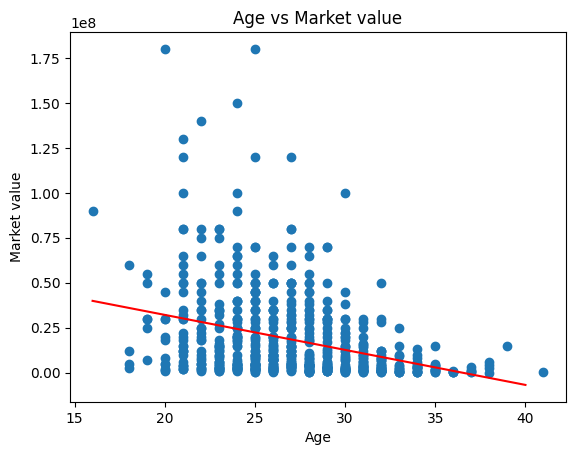

In [26]:
plt.plot(x, y, color='red')

plt.scatter(df.Age, df.MarketValue)
plt.title('Age vs Market value')
plt.xlabel('Age')
plt.ylabel('Market value')
plt.show()

In [27]:
df.MarketValue.describe()

count    6.230000e+02
mean     1.840903e+07
std      2.426195e+07
min      5.000000e+04
25%      2.900000e+06
50%      9.000000e+06
75%      2.500000e+07
max      1.800000e+08
Name: MarketValue, dtype: float64

In [28]:
df.MarketValue.mean()

18409028.892455857

In [29]:
df_age_young = df[df.Age < 25]
df_age_middle = df[(df.Age >= 25) & (df.Age < 30)]
df_age_old = df[df.Age>=30]

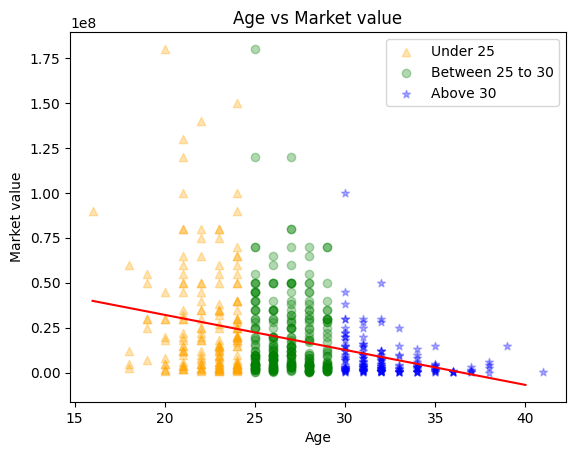

In [30]:

plt.plot(x, y, color='red')

plt.scatter(df_age_young.Age, df_age_young.MarketValue, label='Under 25', color='orange', marker='^', alpha = 0.3)
plt.scatter(df_age_middle.Age, df_age_middle.MarketValue, label='Between 25 to 30', color='green', marker='o', alpha = 0.3)
plt.scatter(df_age_old.Age, df_age_old.MarketValue, label='Above 30', color='blue', marker='*', alpha = 0.3)

plt.title('Age vs Market value')
plt.xlabel('Age')
plt.ylabel('Market value')
plt.legend()
plt.show()

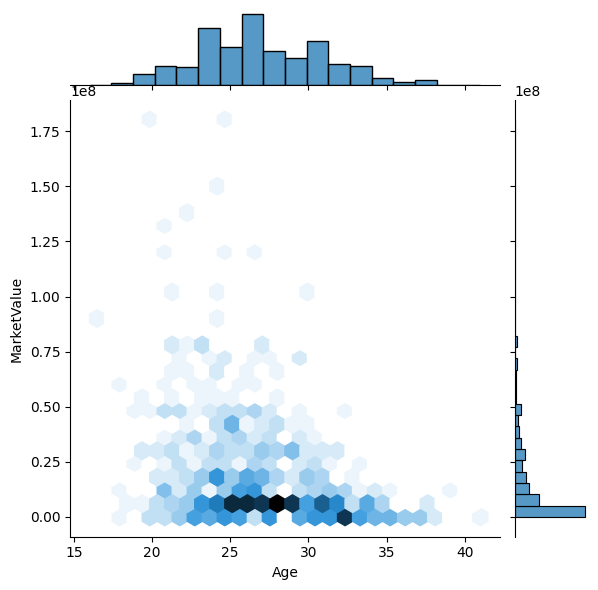

In [31]:
sns.jointplot(x = 'Age', y = 'MarketValue', data = df, kind = 'hex')
plt.show()

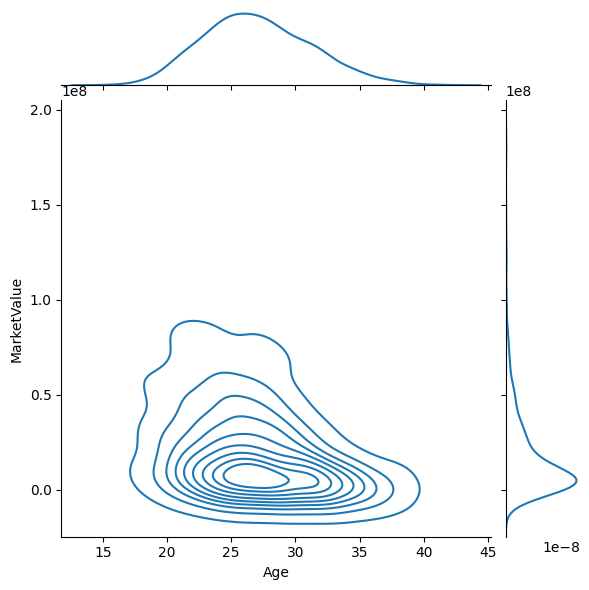

In [32]:
sns.jointplot(x = 'Age', y = 'MarketValue', data = df, kind = 'kde')
plt.show()

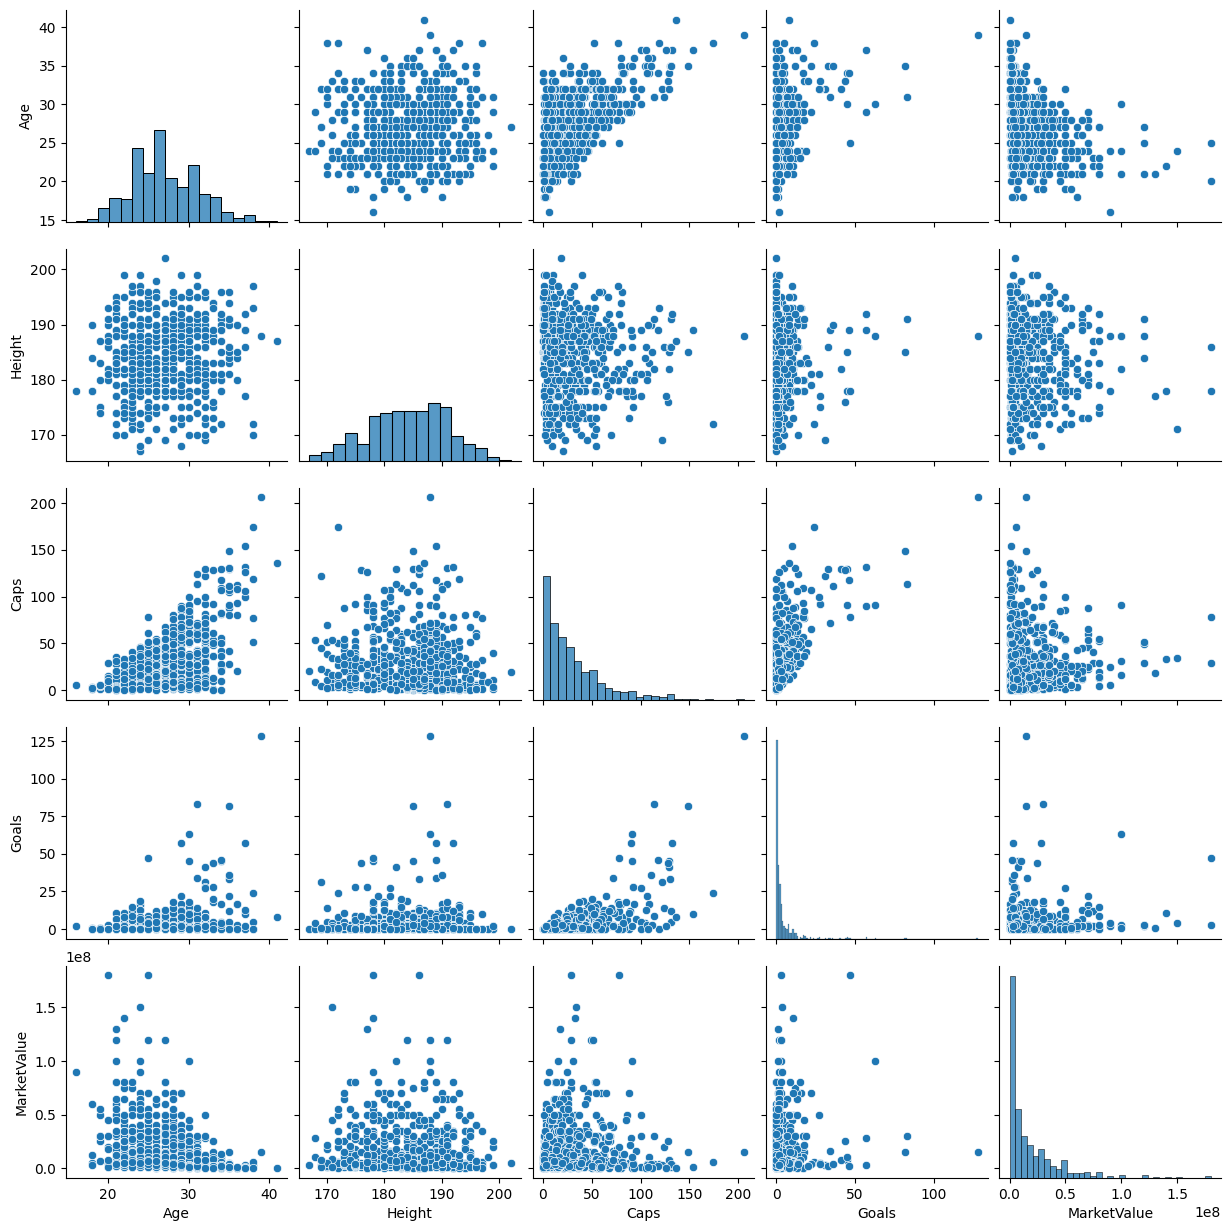

In [33]:
sns.pairplot(df)
plt.show()

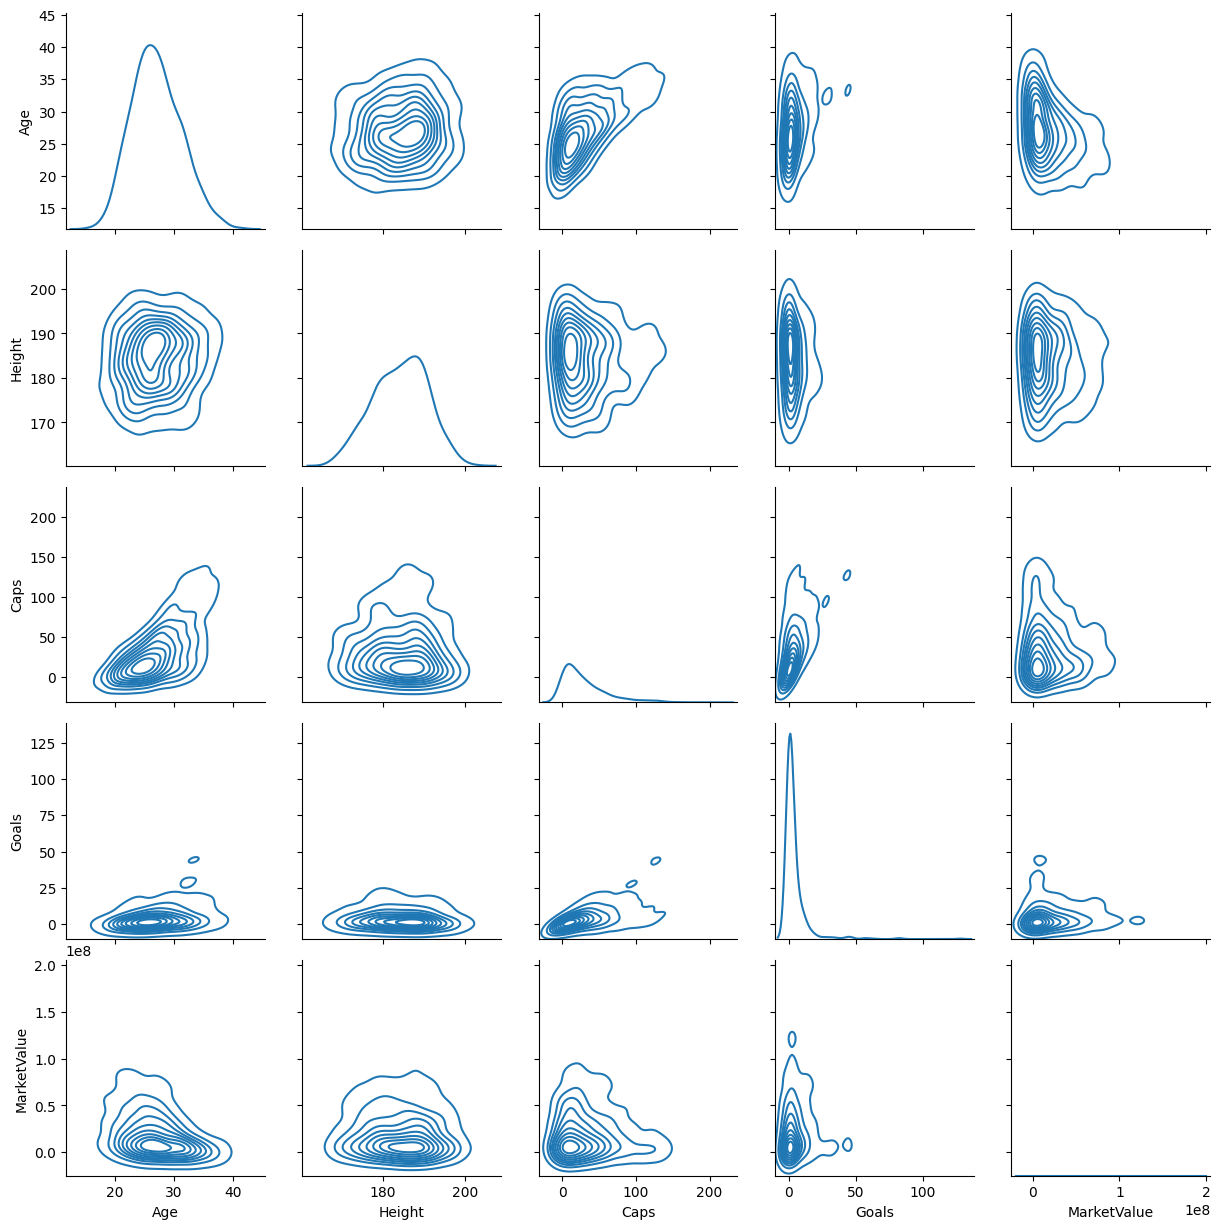

In [34]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)
plt.show()

In [35]:
df.columns

Index(['Name', 'Position', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals',
       'MarketValue', 'Country'],
      dtype='object')

In [36]:
import plotly.express as px

In [52]:
fig = px.scatter_3d(df, x='Goals', y='MarketValue', z='Age', color='Position')
fig.show()

In [38]:
# Goals vs Market value
# Pearson correlation between age and market value
r, p = stats.pearsonr(df.Goals, df.MarketValue)
print(f'Correlation (r): {r:.3f}')
print(f'P-value: {p:.3f}')

Correlation (r): 0.107
P-value: 0.007


In [39]:
# Kendall's tau correlation between age and market value
r, p = stats.kendalltau(df.Goals, df.MarketValue)
print(f'Correlation (r): {r:.3f}')
print(f'P-value: {p:.3f}')

Correlation (r): 0.101
P-value: 0.001


In [40]:
# Spearman correlation between age and market value
r, p = stats.spearmanr(df.Goals, df.MarketValue)
print(f'Correlation (r): {r:.3f}')
print(f'P-value: {p:.3f}')

Correlation (r): 0.139
P-value: 0.000


Here you can clearly see that there is a significant positive correlation between goals and market value

In [41]:
m, c , _, _, _ = stats.linregress(df.MarketValue, df.Goals)
x = range(df.MarketValue.min(), df.Goals.max())
y = m*x + c

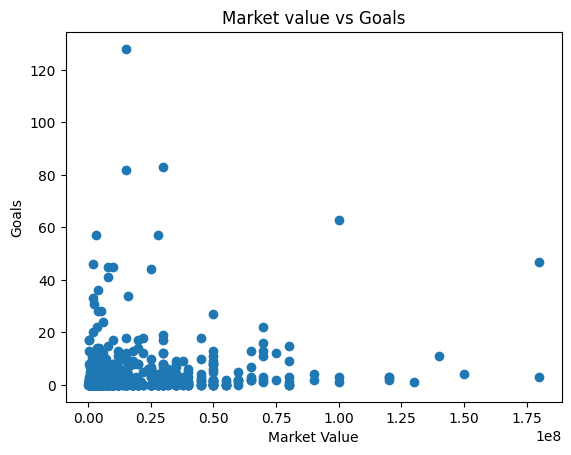

In [42]:
plt.plot(x, y, color='red')

plt.scatter(df.MarketValue, df.Goals)
plt.title('Market value vs Goals')
plt.xlabel('Market Value')
plt.ylabel('Goals')
plt.show()

# Country-wise Analysis

In [43]:
df.columns

Index(['Name', 'Position', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals',
       'MarketValue', 'Country'],
      dtype='object')

In [44]:
df.Country.unique()

array(['Germany', 'Scotland', 'Hungary', 'Switzerland', 'Spain',
       'Croatia', 'Albania', 'Italy', 'Slovenia', 'England', 'Denmark',
       'Serbia', 'Poland', 'Netherlands', 'Austria', 'France', 'Belgium',
       'Slovakia', 'Romania', 'Ukraine', 'Turkiye', 'Georgia', 'Portugal',
       'Czech Republic'], dtype=object)

### Germany

In [45]:
df_germany = df[df['Country'] == 'Germany']

In [46]:
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         26 non-null     object
 1   Position     26 non-null     object
 2   Age          26 non-null     int64 
 3   Club         26 non-null     object
 4   Height       26 non-null     int64 
 5   Foot         26 non-null     object
 6   Caps         26 non-null     int64 
 7   Goals        26 non-null     int64 
 8   MarketValue  26 non-null     int64 
 9   Country      26 non-null     object
dtypes: int64(5), object(5)
memory usage: 2.2+ KB


In [47]:
# Germany players age stats
df_germany.Age.describe()

count    26.000000
mean     28.115385
std       4.650393
min      20.000000
25%      26.000000
50%      27.500000
75%      31.750000
max      38.000000
Name: Age, dtype: float64

In [48]:
# who are the youngest and oldest players in Germany for Euro 2024?
print(f'Youngest player in Germany: {df_germany[df_germany.Age == df_germany.Age.min()].Name.item()}')
print(f'Oldest player in Germany: {df_germany[df_germany.Age == df_germany.Age.max()].Name.item()}')


Youngest player in Germany: Aleksandar Pavlovic
Oldest player in Germany: Manuel Neuer


In [49]:
# What is the age of Toni Kroos?
print(f'Age of Toni Kroos is: {df_germany[df_germany.Name == "Toni Kroos"].Age.item()}')

Age of Toni Kroos is: 34


In [50]:
# Germany Player Goal stats
df_germany['Goals'].describe()

count    26.000000
mean      5.153846
std      10.090361
min       0.000000
25%       0.000000
50%       0.000000
75%       5.250000
max      45.000000
Name: Goals, dtype: float64

In [51]:
# Who has the most goal?
df_germany[df_germany['Goals'] == df_germany.Goals.max()]

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
22,Thomas Müller,Second Striker,34,Bayern Munich,185,right,129,45,8000000,Germany
